In [16]:
%pip install --upgrade pip
%pip install transformers
%pip install tf_keras
%pip install tensorflow
%pip install pandas
%pip install numpy
%pip install torch
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [2]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-04-18 12:57:35.190045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 12:57:36.194133: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#load in data 

#first time running: 
#df = pd.read_csv("../../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")

#now saved
df = pd.read_csv("../out/df_w_emotions.csv")

In [4]:
df

,ID,index,Release Date,Season,Episode,Episode Title,Name,Sentence,emotion,score
0,1,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust,0.840084
1,2,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust,0.611700
2,3,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise,0.714382
3,4,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral,0.911425
4,5,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear,0.420811
...,...,...,...,...,...,...,...,...,...,...
23906,23907,23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,neutral,0.937231
23907,23908,23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,disgust,0.674449
23908,23909,23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,disgust,0.977837
23909,23910,23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,surprise,0.752158


In [5]:
#make index column
#might not be nessecary

# Reset index starting from 1
df.reset_index(drop=False, inplace=True)

# Add 1 to the index to start from 1 instead of 0
df['ID'] = df.index + 1

# If you want to move the ID column to the beginning
# Reorder the columns
df = df[['ID'] + [col for col in df.columns if col != 'ID']]

In [34]:

classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) #false 

text = [str(i) for i in df['Sentence'].tolist()]

#text= df['Sentence']
emotion_scores_list = classifier(text)


# Initialize empty lists to store labels and scores
labels = []
scores = []

# Iterate through each item in emotion_scores_list
for item in emotion_scores_list:
    labels.append(item['label'])
    scores.append(item['score'])

# Append the labels and scores to the DataFrame
df['emotion'] = labels
df['score'] = scores

#8 machine 
#500 tog ca 43 sek
#5000 tog ca 7 min 
#alle tog 33 min


/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/tmp/ipykernel_11685/1729430794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion'] = labels
/tmp/ipykernel_11685/1729430794.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] =

In [36]:
#save so i dont have to reload code 
df.to_csv('../out/df_w_emotions.csv', index=False)  

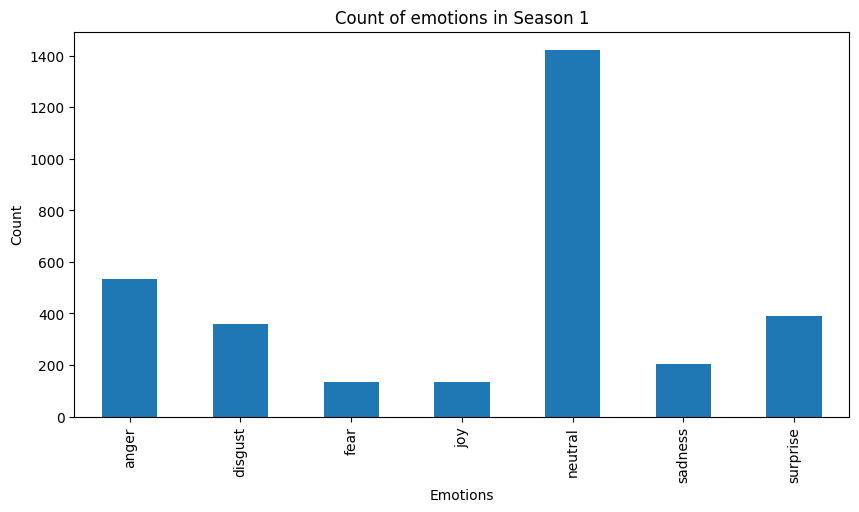

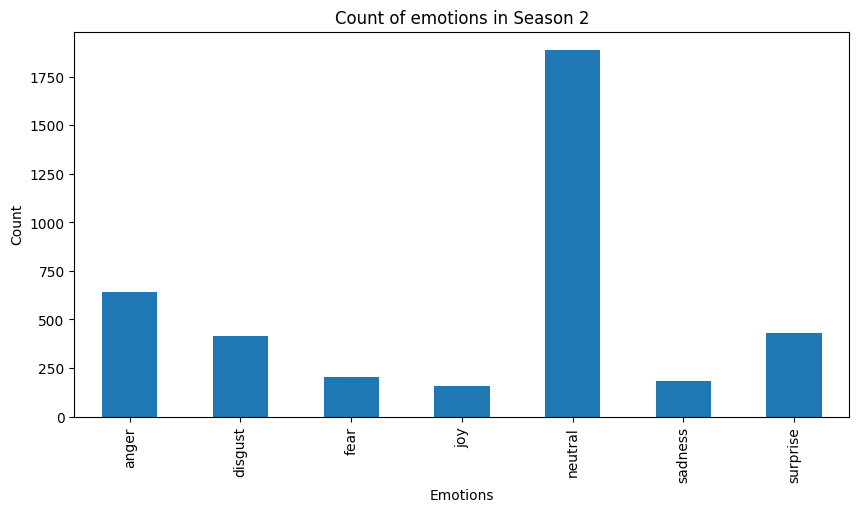

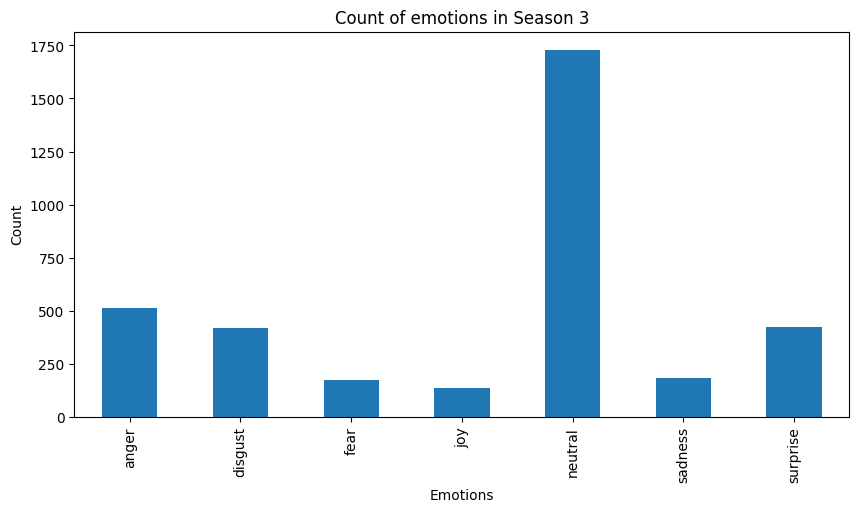

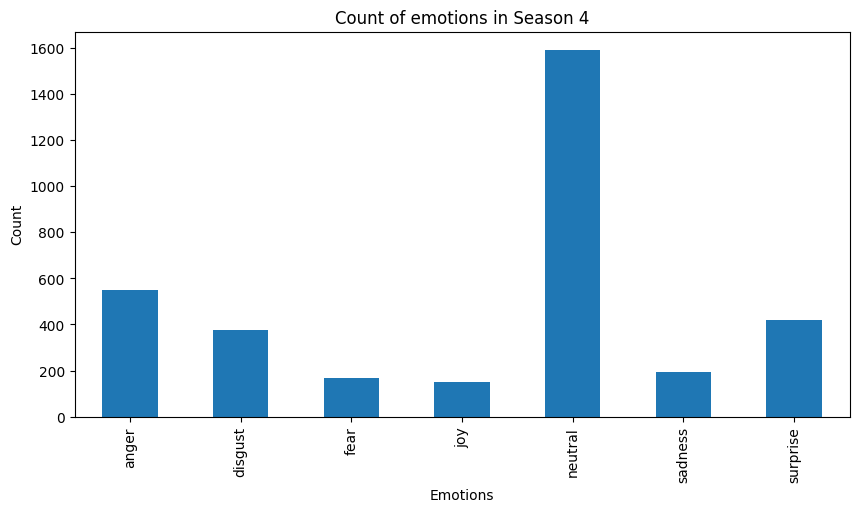

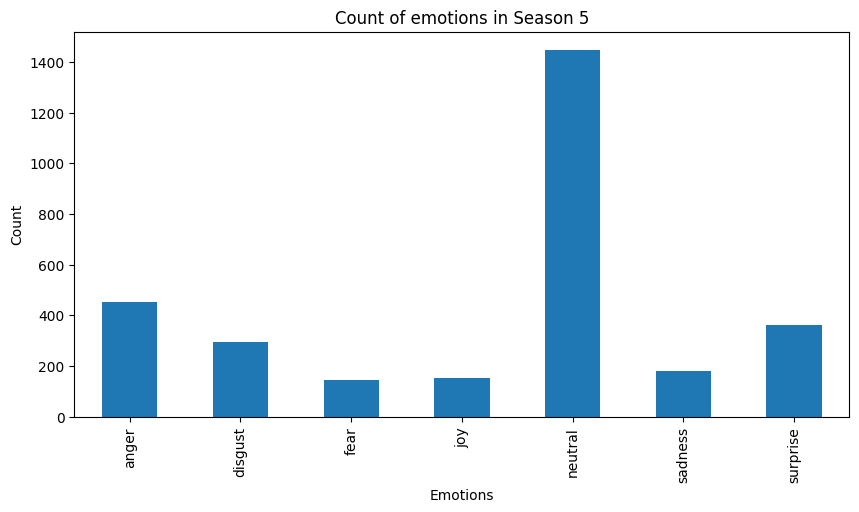

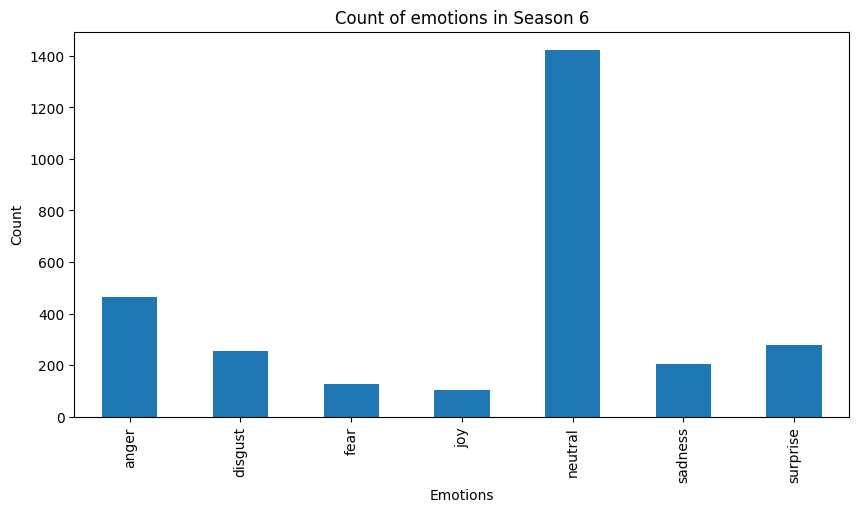

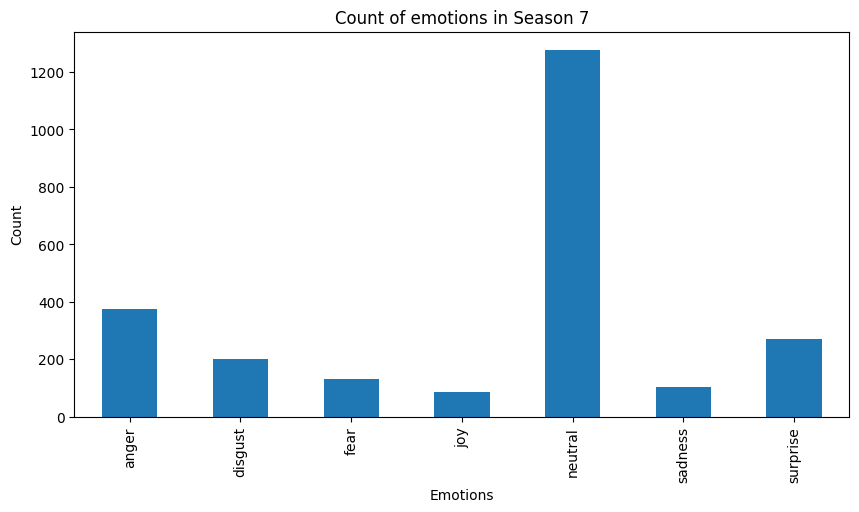

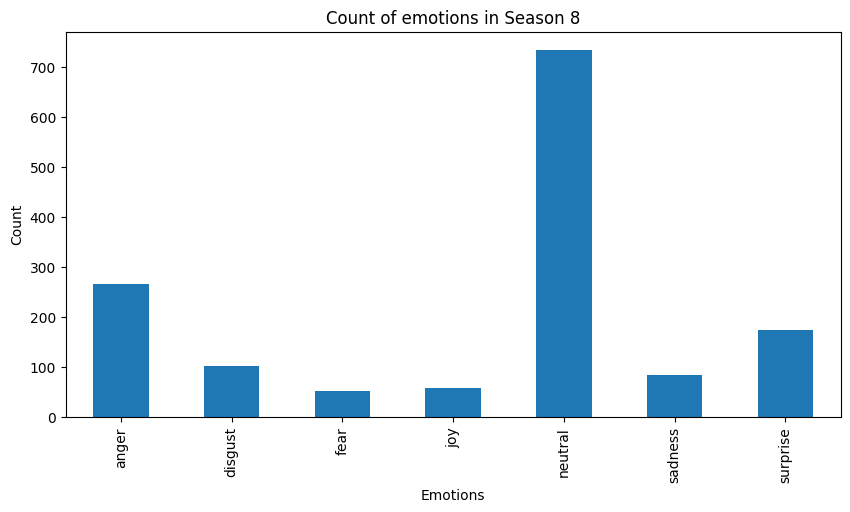

In [7]:
#first type of plots, code to plot all 1 after 1

for season_label in df['Season'].unique():
    season_data = df[df['Season'] == season_label]
    plt.figure(figsize=(10, 5))
    ax = season_data['emotion'].value_counts().sort_index().plot(kind='bar', title=f'Count of emotions in {season_label}')
    ax.set_xlabel('Emotions')
    ax.set_ylabel('Count')
    #plt.savefig(f"../out/emotions_count_{season_label}.png")
    plt.show()


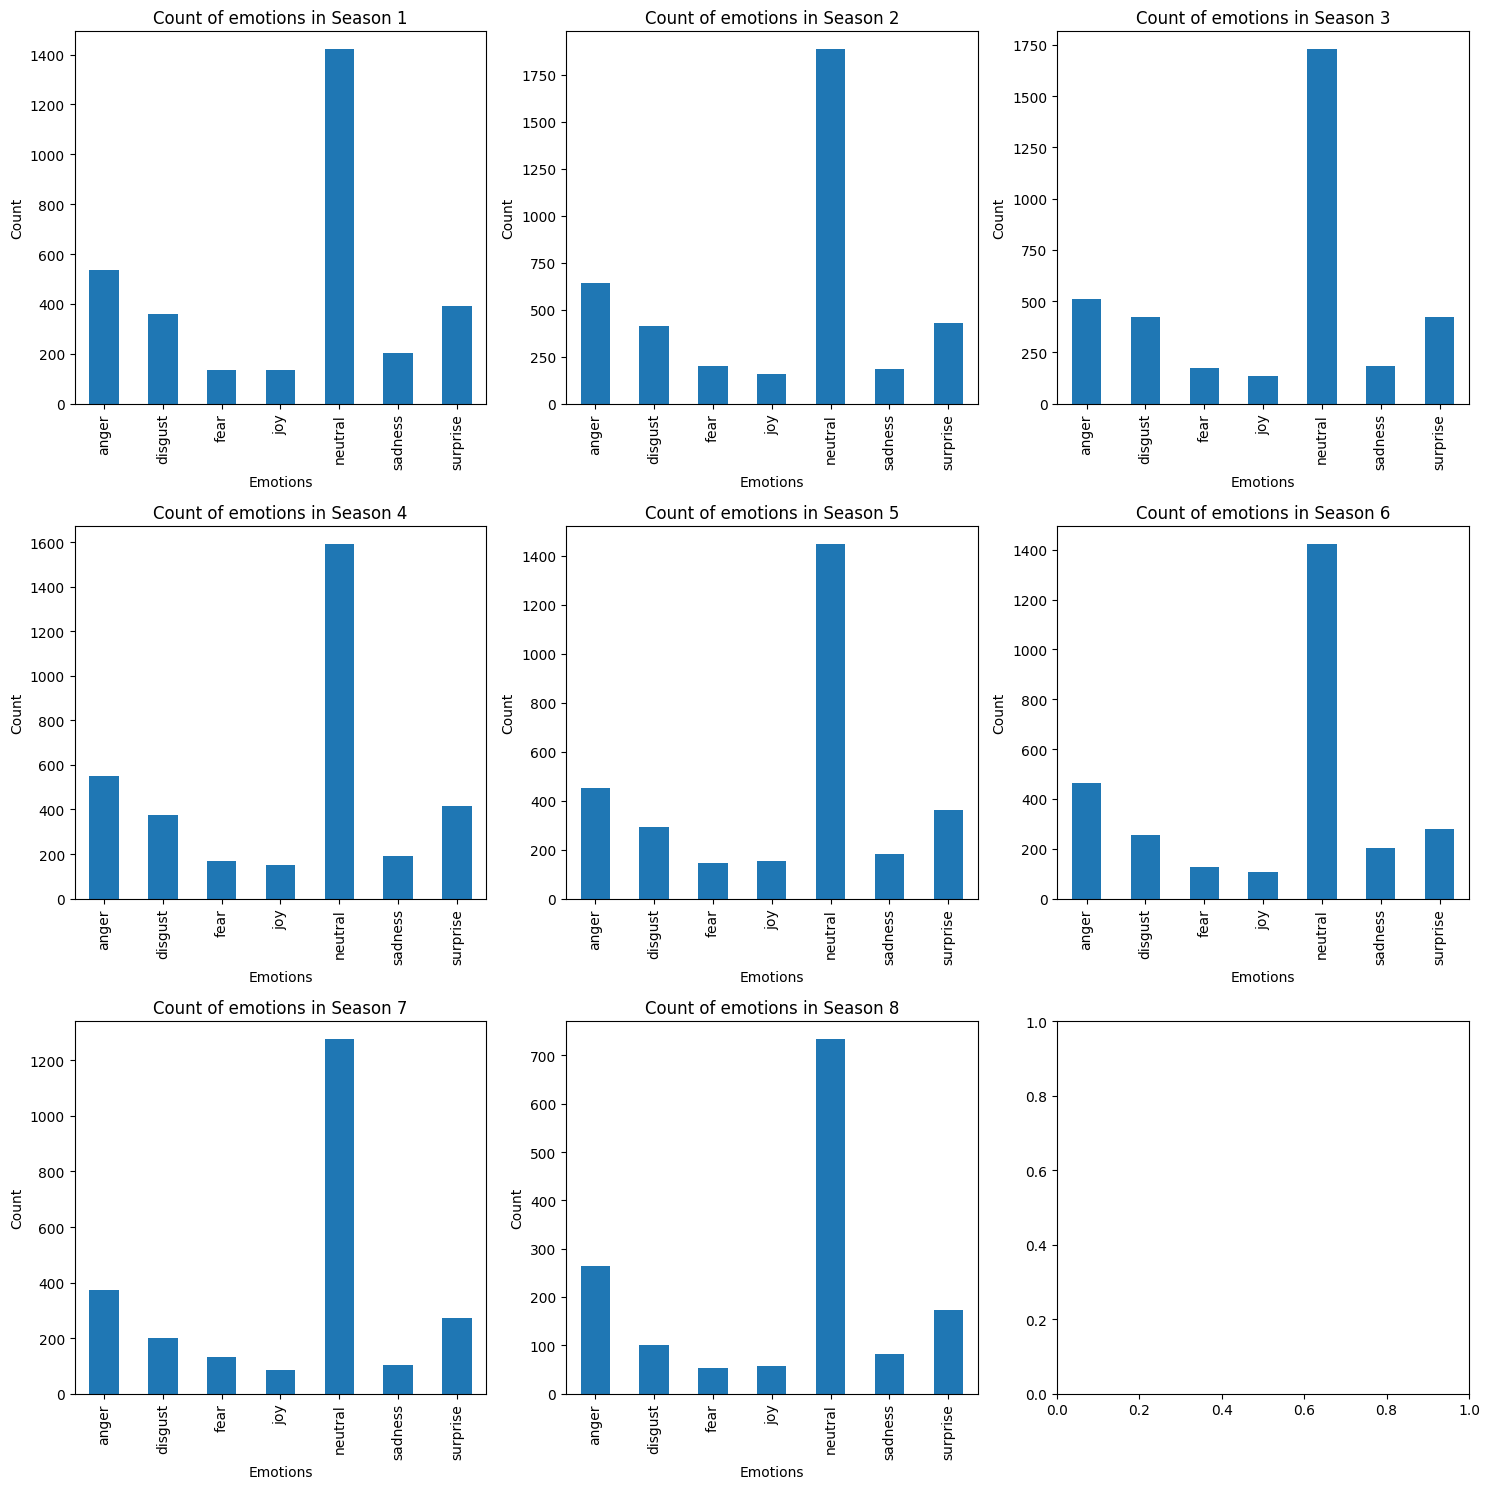

In [26]:
#however i want to have all in 1 plot


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, season_label in enumerate(df['Season'].unique()):
        season_data = df[df['Season'] == season_label]
        ax = season_data['emotion'].value_counts().sort_index().plot(kind='bar', title=f'Count of emotions in {season_label}', ax=axs[i // 3, i % 3])
        ax.set_xlabel('Emotions')
        ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig("../out/Count_all_emotions_for_seasons .png")
plt.show()


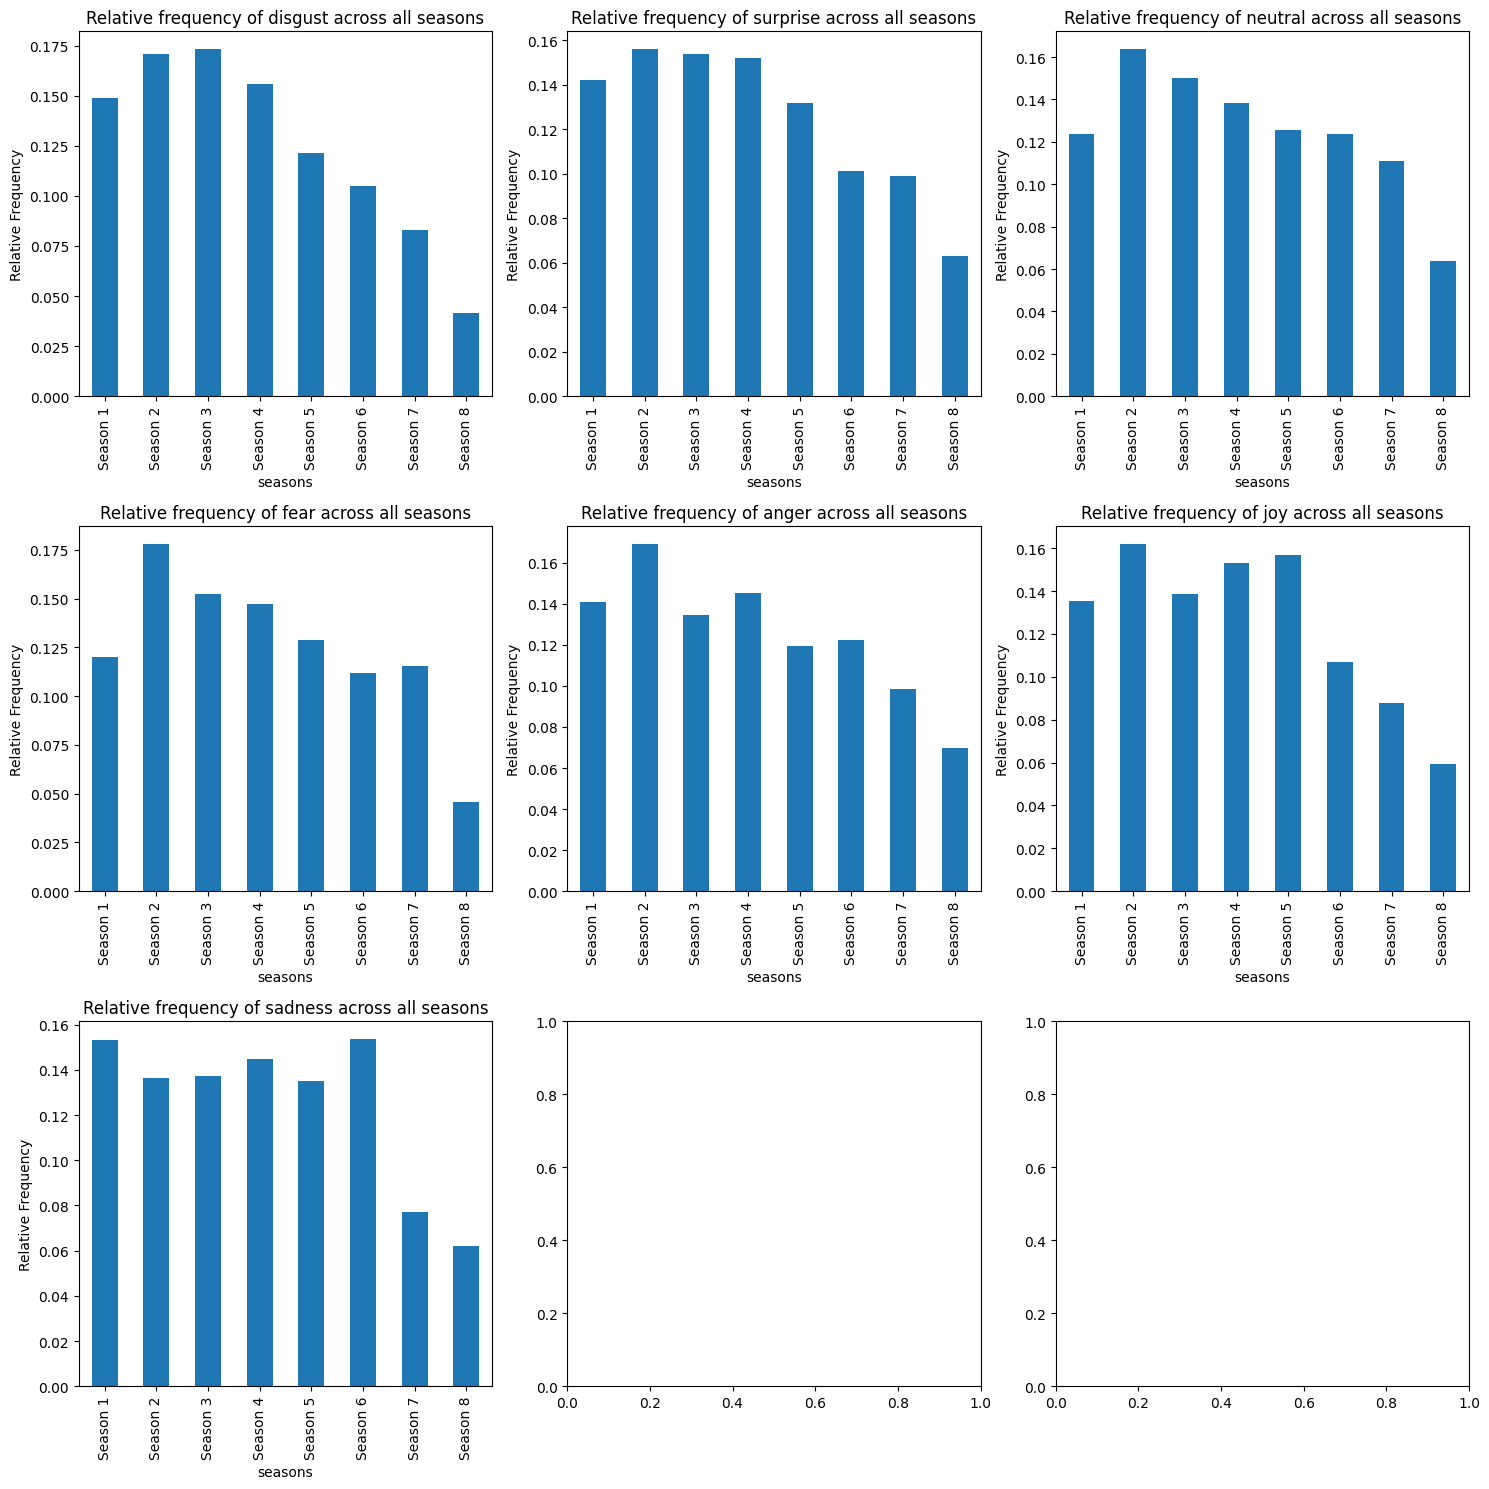

In [27]:
#second type of plots

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, emotion_label in enumerate(df['emotion'].unique()):
    emotion_data = df[df['emotion'] == emotion_label]
    counts = emotion_data['Season'].value_counts().sort_index()
    total_count = counts.sum()
    relative_freq = counts / total_count  # Calculating relative frequency
    ax = relative_freq.plot(kind='bar', title=f'Relative frequency of {emotion_label} across all seasons', ax=axs[i // 3, i % 3])
    ax.set_xlabel('seasons')
    ax.set_ylabel('Relative Frequency')

plt.tight_layout()
plt.savefig("../out/Relative_frequency_of_emotions_across_all_seasons.png")
plt.show()

